# Experimento Computacional 1
Utilizando os métodos de geração de números aleatórios, desenvolva um software que
possibilite gerar as seguintes distribuições de probabilidades:
1-Exponencial

2-Normal (Gaussiana)

3-Qui-Quadrado

4-Poisson

In [ ]:
import numpy as np # NÃO foram usadas as funções nativas para gerar distribuições
import matplotlib.pyplot as plt

np.random.seed(1)

Primeiro, vamos gerar uma distribuição uniforme e usá-la para calcular as demais.

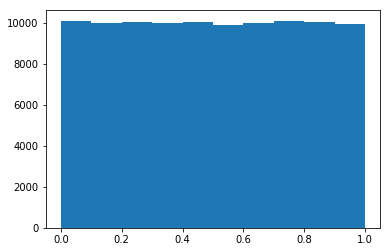

In [14]:
amostras = np.random.random(99999) # Por padrão, a função random() gera uma distribuição uniforme
plt.hist(amostras) # amostras são valores no intervalo [0,1)
plt.show()

## Gerando a distribuição Exponencial

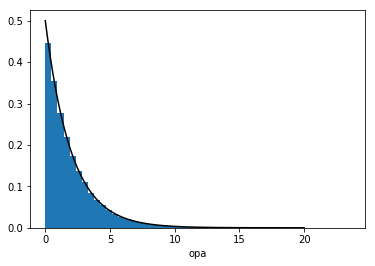

In [62]:
lamb = 0.5
amostras_exp = -1/lamb*np.log(amostras) # Inversa da função distribuição cumulativa F_x(X), X é uma v.a.
plt.hist(amostras_exp, 50, density=True)

x = np.linspace(0, 20, len(amostras_exp))
y1 = lamb*np.exp(-x*lamb) # função distribuição de probabilidade exponencial, ou f_x(X)
plt.plot(x,y1,'k')
plt.show()


## Gerando a distribuição Normal

In [ ]:
amostras_gaus